In [1]:
from google.colab import drive
drive.mount('/content/drive')


import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Glos')
folder = os.path.join('/content/drive/My Drive/Colab Notebooks/Glos')
!ls

Mounted at /content/drive
 ANN.ipynb	        heart.csv	   Seed_Data.csv
 breast-cancer.data     heartdata.csv	   Social_Network_Ads.csv
 Churn_Modelling.csv    IMDBDataset.csv    SVMDTr.ipynb
 classification.ipynb   Live.csv	   Untitled0.ipynb
 clustering.ipynb       LogisticNB.ipynb  'Wholesale customers data.csv'
 CNN.ipynb	        malldata.csv	   Wine.csv
 diabetes.csv	        nlplab.ipynb


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
#Loading Dataset
data = pd.read_csv("Churn_Modelling.csv")

In [4]:
#Generating Matrix of Features
X = data.iloc[:,3:-1].values

In [5]:
#Generating Dependent Variable Vectors
Y = data.iloc[:,-1].values

In [6]:
#Encoding Categorical Variable Gender
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
X[:,2] = np.array(LE1.fit_transform(X[:,2]))

In [7]:
#Encoding Categorical variable Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [8]:
#Splitting dataset into training, testing and validation datasets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_test,Y_test,test_size=0.5,random_state=42)

In [9]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

In [10]:
#Initialising ANN
ann = tf.keras.models.Sequential()

In [11]:
 #Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [12]:
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [13]:
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [14]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [15]:
#Fitting ANN
history = ann.fit(X_train,Y_train,validation_data=(X_val, Y_val),batch_size=32,epochs = 100)

Epoch 1/100
219/219 [==============================] - 3s 5ms/step - loss: 0.6195 - accuracy: 0.7361 - val_loss: 0.5330 - val_accuracy: 0.8020
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 0.5118 - accuracy: 0.7939 - val_loss: 0.4799 - val_accuracy: 0.8040
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 0.4740 - accuracy: 0.7970 - val_loss: 0.4485 - val_accuracy: 0.8107
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4468 - accuracy: 0.8064 - val_loss: 0.4249 - val_accuracy: 0.8180
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8107 - val_loss: 0.4089 - val_accuracy: 0.8187
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.4141 - accuracy: 0.8127 - val_loss: 0.3960 - val_accuracy: 0.8193
Epoch 7/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4025 - accuracy: 0.8136 - val_loss: 0.3865 - val_accuracy: 0.8233

In [16]:
#Predicting result for Single Observation
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1,50000]])) > 0.5)

[[False]]


In [17]:
loss, acc = ann.evaluate(X_test, Y_test)

print('Test Accuracy: %f' % (acc*100))

47/47 [==============================] - 0s 1ms/step - loss: 0.3196 - accuracy: 0.8760
Test Accuracy: 87.599999


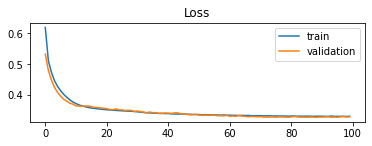

In [18]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()

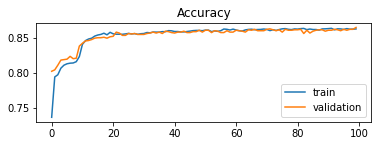

In [19]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='validation')
pyplot.legend()
pyplot.show()